## A script that retrieves atoms with a specified number of neighbors

In [ ]:
from ase.neighborlist import NeighborList
from numpy import average, eye

def get_n_neighbor_idx(
    atoms,
    num_neighbors:int,
    cutoff:float=None,
    margin_of_error:float=1e-1,
)->list:
    """
    Given ase.Atoms system is a list of indexes with atoms
    a list of indexes with atoms with n-neighbors is returned.

    Parameters
    ----------
    atoms: ase.Atoms
                a system of atoms
    num_neighbors: int
                indices of atom with how much neighbours will be returned
    cutoff: float, optional
                a distance between atoms
                default: an average between atoms
    margin_of_error: float,
                correction to the measured distances
    """
    __len_atoms = len(atoms)
    __cutoff = float(average(atoms.get_all_distances()[~eye(__len_atoms, dtype=bool)]) * 0.25 if cutoff is None else abs(cutoff * 0.25)) + margin_of_error

    # below 2 lines are based on: https://wiki.fysik.dtu.dk/ase/ase/neighborlist.html
    __nl = NeighborList(
        [__cutoff]*__len_atoms, # List of cutoff radii
        self_interaction=False, # atom will not return itself as a neighbour
        bothways=True # Default is to return only “half” of the neighbors.
    )
    __nl.update(atoms)


    neighbors = [idx for idx in range(__len_atoms) if len(__nl.get_neighbors(idx)[0]) == num_neighbors]

    # if no indexes are returned a message is printed with available number of neighbors
    if not neighbors:
        print(f"\nNo neighbours detected for num_neighbors={num_neighbors},\navalable values for num_neighbors: {set([len(__nl.get_neighbors(idx)[0]) for idx in range(__len_atoms)])}")

    return neighbors

## testing

<Axes: >

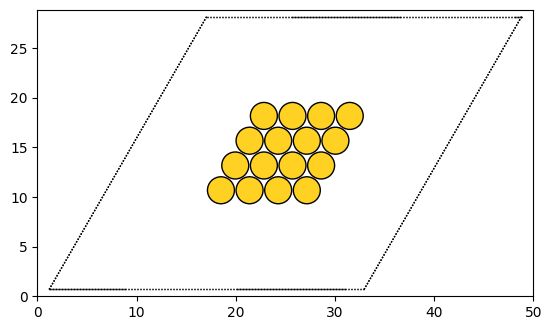

In [ ]:
from ase.visualize.plot import plot_atoms
from ase import Atoms
from ase.build import fcc111, add_adsorbate

slab = fcc111('Au', size=(4, 4, 1))
slab.center(vacuum=10.0)

plot_atoms(slab)

## 1. get inside atoms

[5, 6, 9, 10]


<Axes: >

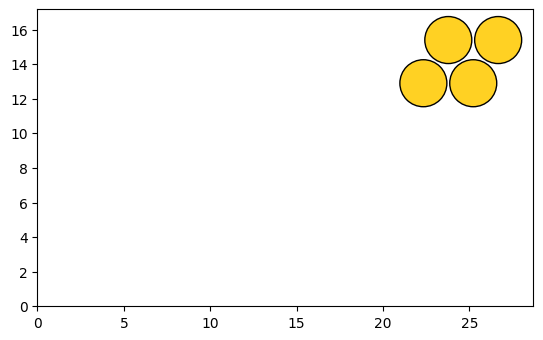

In [ ]:
idx = get_n_neighbor_idx(slab, 6)
print(idx)

# visualisation
bag_of_atoms = Atoms()
for i in idx:
    bag_of_atoms += slab[i]

plot_atoms(bag_of_atoms)

## 2. get border atoms

[0, 1, 2, 3, 4, 7, 8, 11, 12, 13, 14, 15]


<Axes: >

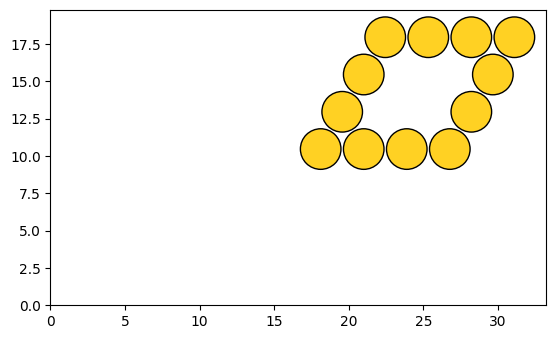

In [ ]:
idx = [i for i in range(len(slab)) if i not in idx] # taking negative of above
print(idx)

# visualisation
bag_of_atoms = Atoms()
for i in idx:
    bag_of_atoms += slab[i]

plot_atoms(bag_of_atoms)